# Setting up the Environment and Loading Data 

In [ ]:
pip install prince==0.13.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\mouho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from ucimlrepo import fetch_ucirepo 
from matplotlib.colors import ListedColormap
import prince

# Loading the dataset

**The Heart Disease dataset** from the UCI Machine Learning Repository is a widely used resource for analyzing cardiovascular health data. It comprises information collected from various medical centers, with the Cleveland database, with the goal of predicting the presence of heart disease. Each row represents a patient, and the features capture various health indicators and test results. The target variable (target) indicates whether the patient has heart disease (1) or does not (0).

**Key Features:**

 * Attributes: The complete dataset has 76 attributes, though only 14 are commonly used for predictive modeling.
 * Age: Age of the patient in years.
 * Sex: Gender of the patient (1 = male, 0 = female).
 * cp (Chest Pain Type):
      * 1: Typical angina (chest pain related to decreased blood supply to the heart)
      * 2: Atypical angina
      * 3: Non-anginal pain
      * 4: Asymptomatic (no chest pain)

 * trestbps (Resting Blood Pressure): Resting blood pressure in mm Hg on admission to the hospital.
 * chol (Cholesterol): Serum cholesterol in mg/dL.
 * fbs (Fasting Blood Sugar): Fasting blood sugar > 120 mg/dL (1 = true, 0 = false).
 * restecg (Resting Electrocardiographic Results):
     * 0: Normal
     * 1: ST-T wave abnormality
     * 2: Left ventricular hypertrophy
       
 * thalach (Maximum Heart Rate Achieved): The highest heart rate achieved during exercise testing.
 * exang (Exercise-Induced Angina): Angina induced by exercise (1 = yes, 0 = no).
 * oldpeak (ST Depression): ST depression induced by exercise relative to rest; a measure related to heart stress.
 * slope (Slope of the Peak Exercise ST Segment):
    * 1: Upsloping
    * 2: Flat
    * 3: Downsloping
      
 * ca (Number of Major Vessels Colored by Fluoroscopy): Number of major blood vessels (0-4) colored by fluoroscopy, indicating blockages.
 * thal (Thalassemia):
    * 3: Normal
    * 6: Fixed defect (no blood flow in some part of the heart)
    * 7: Reversible defect (reduced blood flow during exercise but not at rest)

 * Target Variable: Indicates the presence or absence of heart disease, with values ranging from 0 (no presence) to 4 (various levels of presence). For most studies, the target variable is converted to binary:
   * 0: No heart disease
   * 1: Presence of heart disease



**Data Types Analysis and Usage**


In the Heart Disease dataset, the features can be classified into three main types: **continuous**, **categorical**, and **binary** (numerical but with only two possible values). 

Below, we categorize each attribute accordingly and describe how we will use them for **PCA, CA, MCA,** and (optionally) FAMD.

**1. Continuous Variables**

These variables represent numerical measurements that can take a wide range of values. They are ideal for Principal Component Analysis **(PCA)**.

* Age
* trestbps
* chol (Cholesterol)
* thalach (Maximum Heart Rate Achieved).
* oldpeak (ST Depression): 

We will apply PCA to the subset of continuous variables to identify the most significant components that explain the variance in these health indicators.

**2. Categorical Variables**

These variables take on a limited set of discrete values representing categories. For Correspondence Analysis **(CA)** and Multiple Correspondence Analysis **(MCA)**, categorical data is essential.

* cp (Chest Pain Type)  can take on of 4 values {1, 2, 3, 4}
* restecg (Resting Electrocardiographic Results): can take on of 3 values {0, 1, 2}
* slope (Slope of the Peak Exercise ST Segment):can take on of 3 values {0, 1, 2}
* ca (Number of Major Vessels Colored by Fluoroscopy): Values from 0 to 4.
* thal (Thalassemia):
0: Normal
1: Fixed defect
2: Reversible defect
Usage:

CA: We will select the two most informative categorical variables (e.g., cp and thal) to create a contingency table for Correspondence Analysis.
MCA: We will include all categorical variables to explore patterns and relationships among them.

**3. Binary Variables**

These are numerical variables that take on only two possible values, often representing "yes" or "no" conditions. While technically numerical, they are usually treated as categorical for analysis.

Sex:

0: Female
1: Male

fbs (Fasting Blood Sugar > 120 mg/dL):

0: No
1: Yes

exang (Exercise-Induced Angina):

0: No
1: Yes

Target Variable (heart disease):

0: No heart disease
1: Presence of heart disease


Usage:

These variables will be treated as categorical for the MCA analysis since they represent discrete categories.
For the target variable, we will use it as the outcome variable to interpret the results of our dimensionality reduction analyses.

In [ ]:
  
# fetch dataset 
#dataset=pd.read_csv('./heart.csv',delimiter=',')
  
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
dataset = heart_disease.data.features 
y = heart_disease.data.targets 

y = pd.Series(y.values.flatten())

# Map target values as specified
dataset['target'] = y.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})



# Dataset General Information

In [ ]:
#Analyse des premières lignes et des infos générales
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
#Checking missing values
print("Valeurs manquantes par colonne :\n", dataset.isnull().sum())

Valeurs manquantes par colonne :
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
#we use median for ca and mode for thal as it is a categorical data
dataset['ca'] = dataset['ca'].fillna(dataset['ca'].median())
dataset['thal'] = dataset['thal'].fillna(dataset['thal'].mode()[0])  

**descriptive statistics of the dataset**

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**We can observe that our dataset is well balanced between the two targets**

In [ ]:

dataset['target'].value_counts()


0    164
1    139
Name: target, dtype: int64

# Visualisation of the distribition of continuous variables

**Age Distribution**
 * The distribution of individuals without heart disease  is mostly concentrated around the ages of 55 to 65, with a notable peak around 60.
 * There’s a noticeable peak around age 53 to 59 for individuals with heart disease.
 * the results are based on the patient's sample we took in our dataset, the majority of patients are aged btween 50 and 65.
 * We can say that the age distribution follows a normal distribution skewed to the left.
   
This could indicate that age is a significant factor in heart disease, though both groups have overlapping age ranges.


**Cholesterol (chol) Distribution**
 * The cholesterol distribution displays higher cholesterol values for both individuals without or whith heart disease (target = 0 / target = 1), with a concentration around 200-250.
 *  The overlap indicates it's not a standalone predictor.



**Oldpeak Distribution**
 * It is highly skewed to the right towards lower values, especially for individuals without heart disease (target = 0).
 * Individuals with heart disease (target = 1) tend to have a wider range of oldpeak values (from 2.5 to 6), suggesting that higher oldPeak is more common in this group.
This variable could be an interesting indicator in distinguishing individuals with heart disease, as the target groups show some separation in their distribution.


**Trestbps Distribution**
 * the distribution is centered around 120-140 for both groups, but individuals with heart disease tend to have a slightly higher resting blood pressure on average.
 Trestbs is not a pertinent predictor

**thalach Distribution**

 * People without heart disease (target = 0) tend to have values of thalach, peaking around the range of 150–170 bpm.
 * People with heart disease (target = 1) generally have higher values of thalach, with many values above 140 bpm and peaking slightly higher in the 130–150 bpm range.

In [ ]:
dataset['age'].min(), dataset['age'].max()


(29, 77)

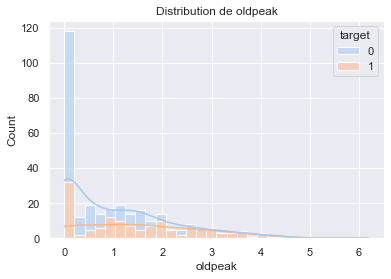

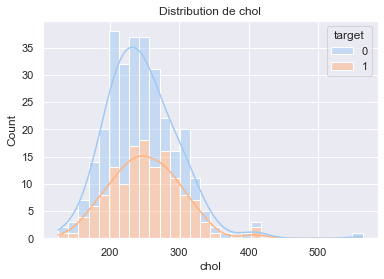

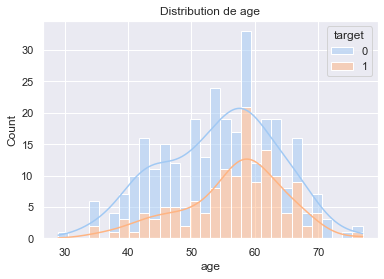

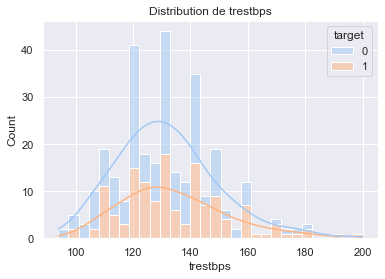

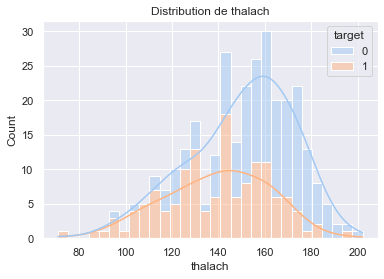

In [ ]:

continuous_features = list(set(['age','trestbps','chol','thalach','oldpeak']))

for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataset, x=col, hue="target",multiple="stack",palette='pastel', kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

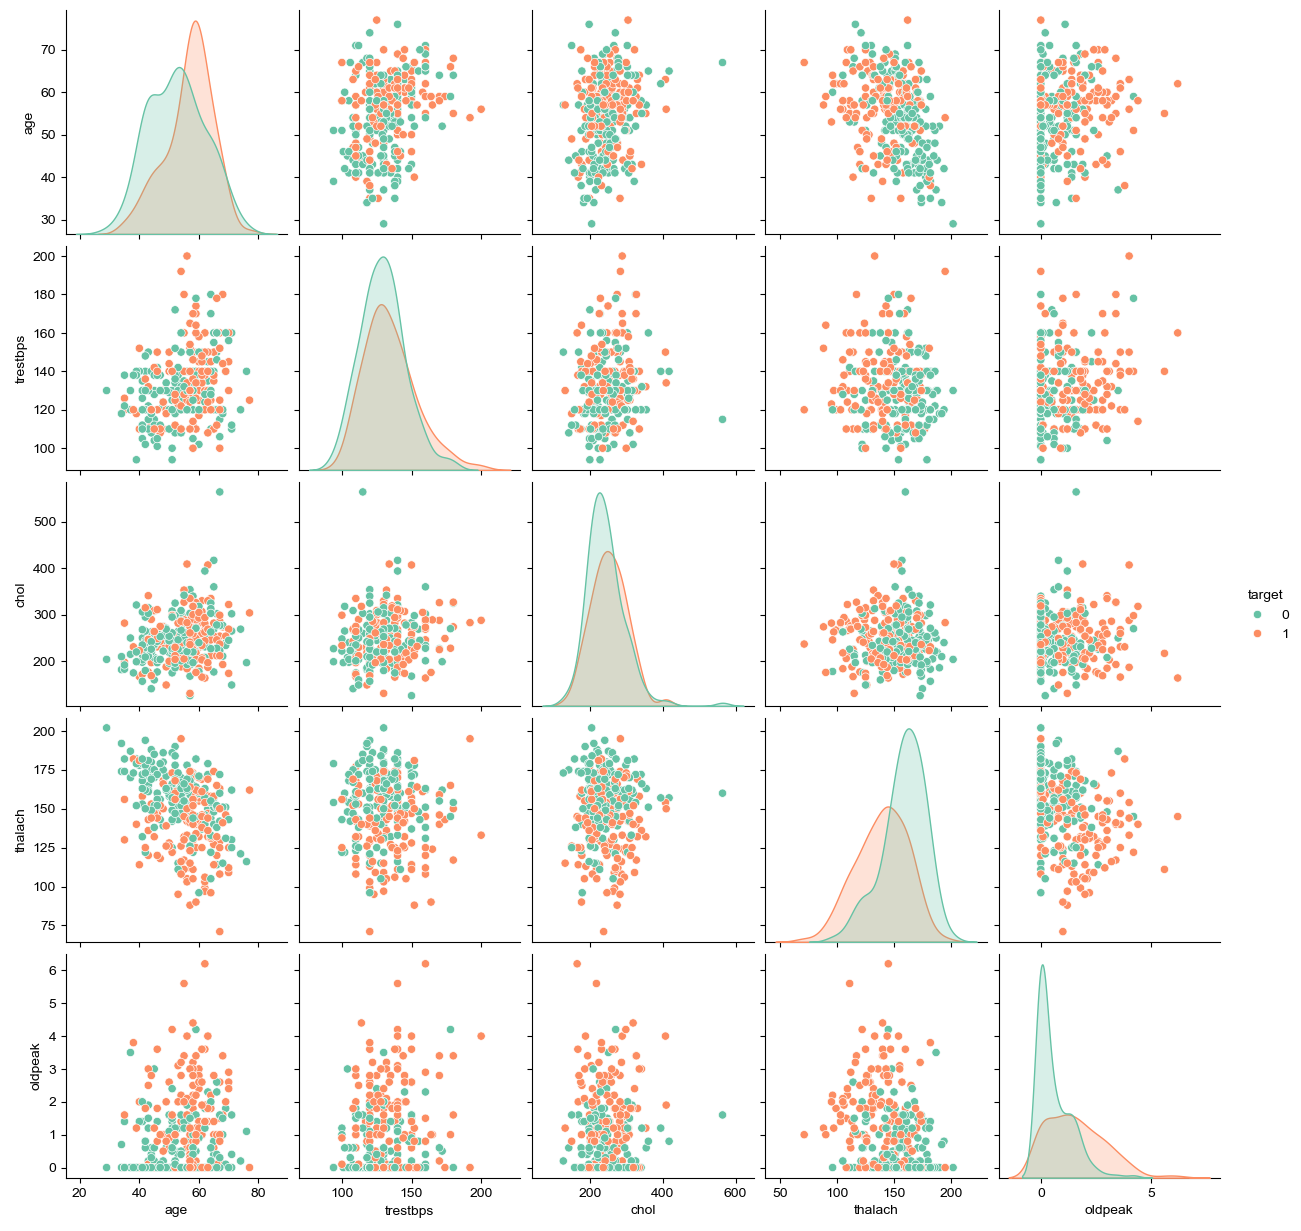

In [ ]:
selected_col=['age','trestbps','chol','thalach','oldpeak','target']
# parplot: creer des scatter plots pour visualiser les relations entre chaque paire de variables dans le jeu de données.
#hue permet de colorer les points du graphique en fonction des catégories d'une colonne (ici target)
#diag_kind: type de graphique à utiliser pour la diagonale de la matrice 

sns.pairplot(dataset[selected_col], hue='target', palette='Set2', diag_kind='kde')
sns.set(style='ticks')
sns.despine()



# Visualization of the distribution of the categorical variables



**Distribution of ca by Presence of Heart Disease**

 * For patients with heart disease (target = 1), most have ca = 0 or ca=1, meaning they have no major vessels blocked or colored by fluoroscopy. As ca values increase (indicating more blocked vessels), the count of patients with heart disease decreases significantly.
 * We can see that the most patients that don't suffer from heart disease have ca=0

**Distribution of cp by Presence of Heart Disease**
The chest pain type (cp) varies noticeably between the two groups:
 * cp = 4  is much more common in patients with heart disease (target = 1).
 * cp = 1, cp = 2, and cp = 3 are more common in patients without heart disease (target = 0), especially cp = 3.

 Higher values of cp are associated with a higher likelihood of heart disease, while lower cp values are more common in patients without heart disease.
 
 
**Distribution of exang by Presence of Heart Disease**

 * Exercise-induced angina (exang = 1) seems to be more common among individuals with heart disease. 
 * However, individuals with exang = 0, (the patient experiences chest pain during exercise) have a higher likelihood of not having heart disease compared to those with exang = 1



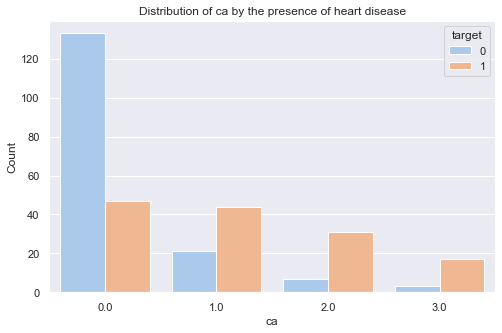

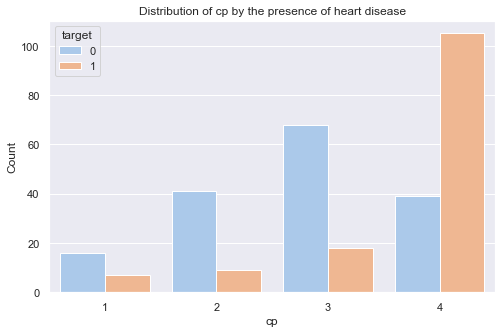

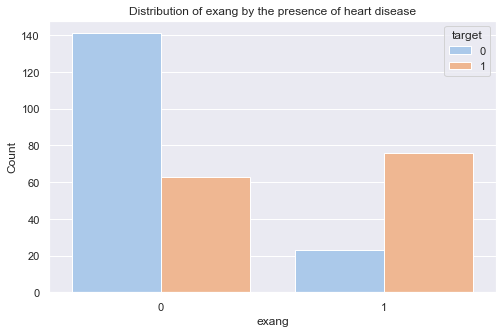

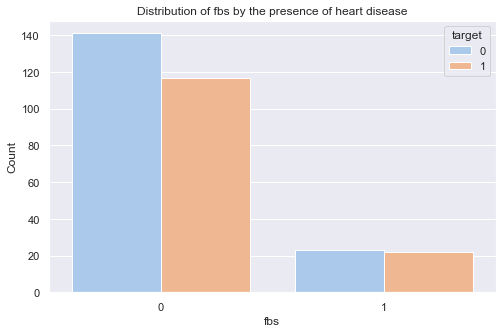

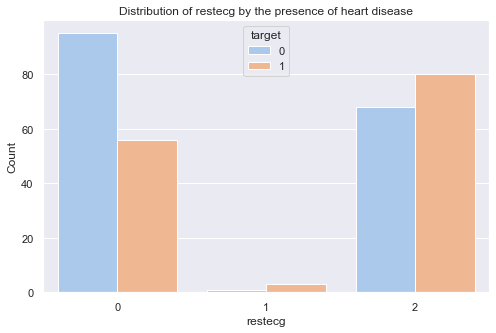

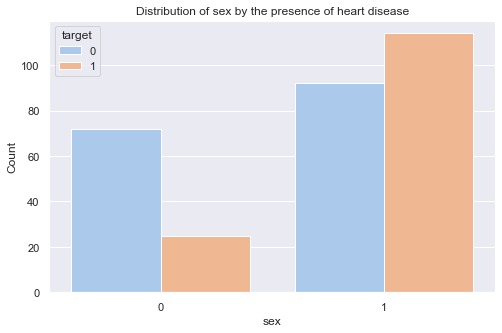

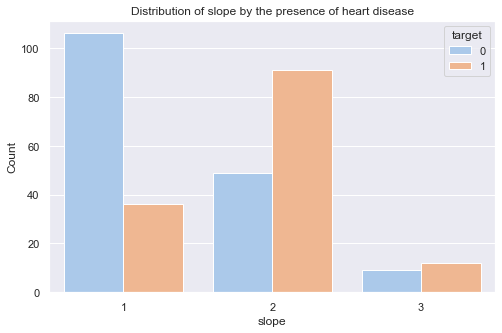

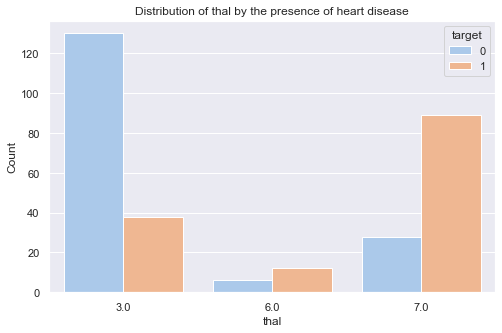

In [ ]:
# Create the list of categorical features for further use in prepare charts

categorical_features = list(set(dataset.columns) -set(continuous_features)-set(['target']))
categorical_features.sort()


for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col, hue='target',palette='pastel')
    plt.title(f'Distribution of {col} by the presence of heart disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


**Confusion Matrix**

The correlation matrix provides insights into the relationships between different variables in the heart disease dataset:

**Target Correlations:**

 * The target variable has the highest positive correlation with cp (chest pain type) at **0.43** and thalach (maximum heart rate achieved) at **0.42**.
 * It shows moderate negative correlations with exang (exercise-induced angina) at **-0.44**, oldpeak (ST depression induced by exercise) at **-0.43**, and ca (number of major vessels) at -0.39. These suggest that lower exang, oldpeak, and ca values may indicate a higher probability of heart disease presence in this dataset.

**Strong Positive Correlations Between Features**
* **slope** and **oldpeack** have a correlation of **0.58**, indicating that the slope of the peak exercise ST segment is somewhat related to the type of oldpeack.
* **exang** and **cp** have a correlation of **0.39**, indicating that the exercise angina is somewhat related to the type of chest pain experienced.


**Negative Correlations**

  * **thalach** has a moderate negative correlation with **age** at **-0.40** and with **exang** at **-0.38**. Older individuals or those who experience exercise-induced angina tend to have lower maximum heart rates.
 
  * **oldpeak** and **slope** have a negative correlation (-0.58),so a higher oldpeak is associated with a less steep, a flatter slope during exercise can be a sign of heart stress or problems.


**Conclusion**
   * For PCA, focusing on variables with higher correlations (either positive or negative) with the **target** variable may enhance interpretability, these features are likely more important in predicting heart disease.
     
   * Features like **cp**, **thalach**, **exang**, **oldpeak**, **ca**, and **slope** may play a more significant role in forming principal components, as they explain more of the variance related to the presence of heart disease. 
     at correlated features.

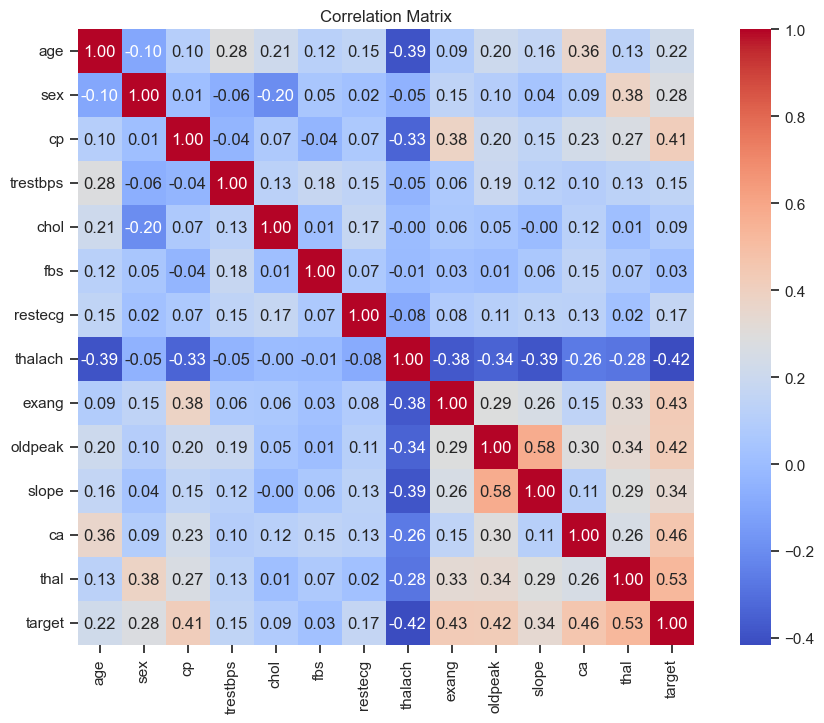

In [ ]:
plt.figure(figsize=(12, 8))

# Heatmap of the correlation matrix
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Title
plt.title('Correlation Matrix')
plt.show()

# Performing PCA using prince

In [ ]:

# Shuffle the dataset
dataset = shuffle(dataset, random_state=42).reset_index(drop=True)


In [ ]:
import prince

pca = prince.PCA(
n_components=4,
n_iter=3,
rescale_with_mean=True,
rescale_with_std=True,
copy=True,
check_input=True,#si il ya des valeurs manquantes et toutes les valeurs sont numériques
engine='sklearn',
random_state=42
)


In [ ]:
#ACP  attend QUE des valeurs numériques.
# Sélectionner uniquement les colonnes numériques
continuous_data = dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
pca=pca.fit(continuous_data)#mat covariance

In [ ]:
X_pca=pca.transform(continuous_data)
X_pca['target'] = dataset['target'].values 
X_pca['ID']= dataset.index
print(X_pca.head())

component         0         1         2         3  target  ID
0          1.066557  0.712002 -0.074817 -0.386126       0   0
1          0.188471 -1.661341  1.238821 -1.073858       1   1
2         -0.152173 -0.274924  0.377496  0.040235       1   2
3          1.043863 -0.499595  1.359892 -0.588237       1   3
4         -0.251013  0.485207  0.674019  0.697627       1   4


In [ ]:
explained_variance = pca.eigenvalues_
percentage_variance = pca.percentage_of_variance_
cumulative_variance = np.cumsum(percentage_variance)

print("Explained variance by each component:", explained_variance)
print("Percentage of Explained variance by each component", percentage_variance)
print("cumulative_variance",cumulative_variance )

Explained variance by each component: [1.79719268 1.09120586 0.87461996 0.76274233]
Percentage of Explained variance by each component [35.94385368 21.82411727 17.49239915 15.25484663]
cumulative_variance [35.94385368 57.76797095 75.2603701  90.51521673]


**Analysis of the plot:**

 * The Plot shows a line representing the explained variance by each principal component. The first component (PC1) explains 35.94% of the total variance in the dataset. The second component (PC2) explains 21.84%, and the third component (PC3) explains 17.49%. Together, these three components account for approximately 75.35% of the total variance.

 * The fourth component (PC4) captures only 15.18% of the variance and adds less significant information compared to the first three components.

 * Retaining the first three components (PC1, PC2, and PC3) represents a good choice for dimensionality reduction, as they explain 75.35% of the variance without losing much information.



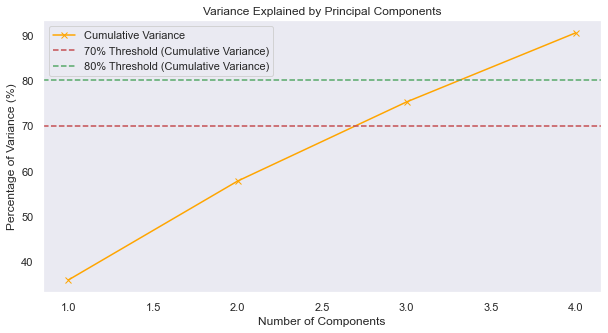

In [ ]:
# Plot the Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', linestyle='-', color='orange', label='Cumulative Variance')
plt.axhline(y=70, color='r', linestyle='--', label="70% Threshold (Cumulative Variance)")
plt.axhline(y=80, color='g', linestyle='--', label="80% Threshold (Cumulative Variance)")
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance (%)')
plt.legend()
plt.grid()
plt.show()


# Visualization using Scree Plot

* The Scree Plot shows a line representing the explained variance by each principal component.
 

**Analysis of the Scree Plot:**


 * The Scree Plot displays the explained variance values for each principal component. The first component (PC1) has an explained variance of 1.8066, which represents the highest value and indicates it captures a significant portion of the information in the dataset. The second component (PC2) has an explained variance of 1.0775, and the third component (PC3) has an explained variance of 0.8834. Together, these three components account for a total explained variance of approximately 3.7675.

 * The fourth component (PC4) has an explained variance of 0.7592, indicating it contributes less to the overall information captured compared to the first three components.

 * Retaining the first three components (PC1, PC2, and PC3) is a good strategy for dimensionality reduction, as they account for the majority of the explained variance, while the fourth component adds minimal additional value.

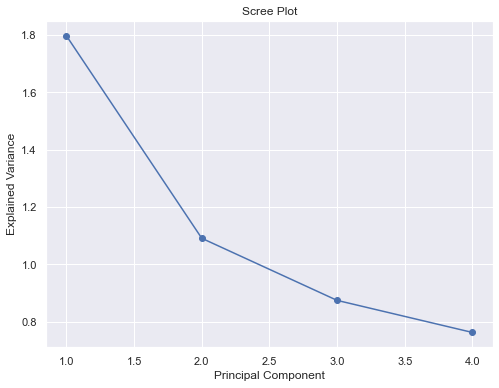

In [ ]:


plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.eigenvalues_)+1),pca.eigenvalues_,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

# Visualization using a correlation circle

* The x-axis represents PC1, and the y-axis represents PC2. These are the first two principal components and they account for most of the variance in the dataset

* Variables that are close to each other like **chol** and **trestbps**, are positively correlated, meaning these variables tend to increase or decrease together.
* **thalach** et  **oldpeak** are on the opposite sides of the plot, are negatively correlated, suggesting that as one increases, the other tends to decrease.
* **age** and **trestbps** have a moderate positive correlation with **PC1** but less so with **PC2*.

* **thalach** is near to the circle circonference has a strong positive loading on **PC2**. 
  
* **oldpeak** has a negative association with **chol** and **trestbps**, given their opposite directions along **PC1**.

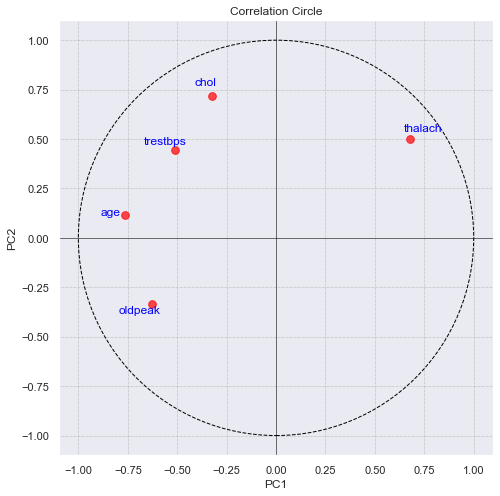

In [ ]:

# Extract the first two components from column_correlations for plotting
correlations_2d = pca.column_correlations.iloc[:, :2].values

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot each variable as a point and add a label for clarity
for i, (x, y) in enumerate(correlations_2d):
    ax.scatter(x, y, color="red", alpha=0.7, s=60)  # Scatter plot for points
    ax.text(x * 1.1, y * 1.1, continuous_data.columns[i], fontsize=12, ha='center', va='center', color="blue")

# Add the unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1)
ax.add_artist(circle)

# Set the x and y limits slightly beyond -1 and 1 for padding
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Add axis lines for x and y
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Correlation Circle')

# Optional: Add grid and equal aspect ratio
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

**A biplot** combines information about both the samples (data points) and features (arrows) on the same plane. The samples are plotted along the principal components, and the arrows represent the contribution of each original feature to these components.

* The **red** and **green** points, representing two classes (the presence or absence of a heart disease) that overlap significantly. This suggests that the first two principal components alone don’t clearly distinguish between the classes.

* Longer arrows like for **cp** and **sex** indicate that these features strongly influence the principal components, meaning they contribute more to the variation captured in PC1 and PC2, the two features are pointed to the same direction these features may be positively correlated.

* Shorter arrows like **chol** imply a weaker influence on the first two components, so they contribute less to the separation observed in this 2D plot.

* We can see vectors as **chol** and **age** contribute significantly to the second component **PC2**

  


# Visualization using a Biplot

C:\Users\mouho\AppData\Local\Temp\ipykernel_35368\58356241.py:30: UserWarning: Adding colorbar to a different Figure <Figure size 576x576 with 2 Axes> than <Figure size 864x576 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Target')


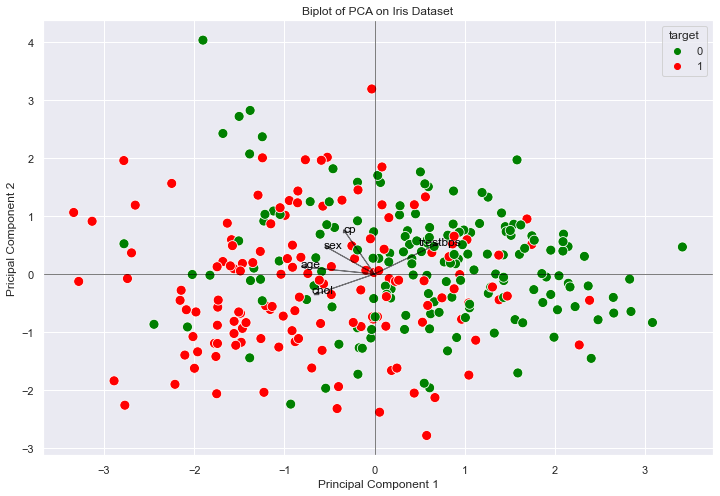

In [ ]:
# Define the first two principal components
pc1 = X_pca[0]  # Replace 'PC1' with the actual name of the first component in X_pca
pc2 = X_pca[1]  # Replace 'PC2' with the actual name of the second component in X_pca


# Scatter plot of the PCA results

loadings=pca.column_correlations

sns.set(style="darkgrid")

plt.figure(figsize=(12,8))

sns.scatterplot(
    x=X_pca[0], y=X_pca[1],
    hue=X_pca['target'],
    palette=['green','red'],
    s=100
)

for i in range(X_pca.shape[0]):
        X_pca[0].iloc[i]+0.02,
        X_pca[1].iloc[i],
        fontsize=9
    


# Plot the scores (data points)
scatter = ax.scatter(pc1, pc2, c=dataset['target'], cmap='viridis', edgecolor='k', alpha=0.6)
plt.colorbar(scatter, label='Target')

for i in range(loadings.shape[0]):
    plt.arrow(0,0,loadings.iloc[i,0],loadings.iloc[i,1],
                color='black', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings.iloc[i,0]+0.05, loadings.iloc[i,1]+0.05,
             dataset.columns[i], color='black', ha='center', va='center', fontsize=12)


plt.title('Biplot of PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Pricipal Component 2')
plt.grid(True)
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.show()

* This plot represents a 3D PCA biplot, representing 3 principal components (PC1, PC2, and PC3), which allows for a more comprehensive view of the data structure.


* the features **cp**, **oldpeak**, and **age**  have relatively longer arrows, meaning they strongly contribute to the variation captured in the first three components.

* The alignment of arrows, such as **cp** and **sex**, shows they are still likely correlated.

* **thalach**  has a relatively long vector in the direction of the x-axis, indicating a strong influence on PCA1

* **chol** points upward which can show a contribution to the third components

* We can see a red outlier points that may represent patients with heart disease but with an atypical profile compared to the majority of heart disease cases.

Adding a third component reveals some structure in the data that wasn’t visible in 2D, though the overlap suggests that these components alone may still not capture all the variability needed for a clear classification.

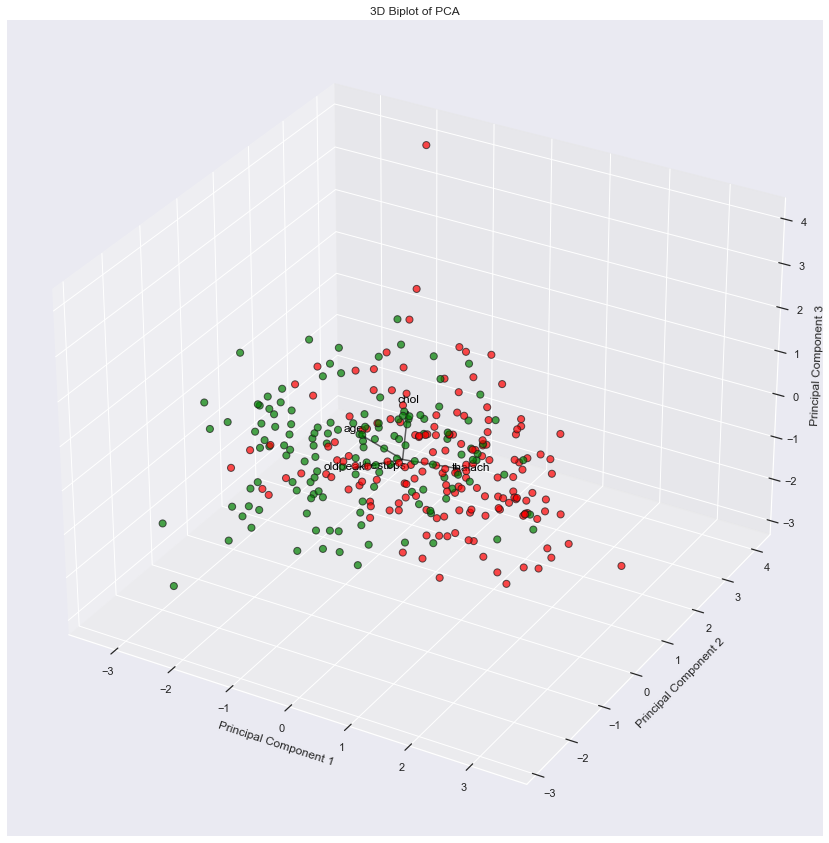

In [ ]:


# Create a 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the observations, colored by target variable
scatter = ax.scatter(
    X_pca[0], X_pca[1], X_pca[2],
    c=dataset['target'], cmap= ListedColormap(['red', 'green']), edgecolor='k', s=50, alpha=0.7
)

# Plot  arrows and add var names
for i in range(loadings.shape[0]):
    ax.quiver(
        0, 0, 0,
        loadings.iloc[i, 0], loadings.iloc[i, 1], loadings.iloc[i, 2],
        color='black', alpha=0.6, arrow_length_ratio=0.1
    )
    ax.text(
        loadings.iloc[i, 0]*1.2, loadings.iloc[i, 1]*1.2, loadings.iloc[i, 2]*1.2,
        loadings.index[i], color='black', ha='center', fontsize=12
    )

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Biplot of PCA')

# Show plot
plt.show()

# PCA Discussion

In this dataset, PCA effectively reduces dimensionality and captures major data patterns but has limitations in separating classes and interpretability. It provides useful insights but may need to be combined with other techniques for better classification results.


**Strengths of PCA in This Dataset**

 * Dimensionality Reduction: PCA reduces the dataset to a few components, with three components capturing 75.26% of the variance. This simplifies the data while retaining most information.
   
 * Data Visualization: The 2D and 3D biplots make it easier to visualize patterns and relationships between feature**PCA** can reduce noise by eliminating components with very low variance, which often correspond to noise rather than meaningful patterns features, potentially enhancing downstream 

nalysis.
   
**Weaknesses of PCA in This Dataset**

 * Limited Class Separation: The overlap in the 2D and 3D plots shows that PCA does not clearly separate the heart disease classes, which limits its effectiveness for classifPCA components are linear combinations of the original features, so interpreting the principal components can be challenging, we lose the straightforward interpretation of the original variables.

 * PCA captures only linear relationships among features. If there are important non-linear relationships in the heart disease dataset, PCA would not capture them.

 * PCA is sensitive to extreme values, meaning that outliers can influence the principal components to disportionate or potentially skewing resultsclassification.

# Part 02: Correspondence Analysis (CA)

Before choosing the two variables on which we will perform Correspondence Analysis (CA), our approach is not to select them randomly, but to choose those that show the strongest correlation using a Corelation matrix 

In [ ]:
only_categorical =dataset[['target', 'cp', 'restecg', 'slope', 'ca', 'thal', 'sex', 'fbs', 'exang', 'age']]
only_categorical

,target,cp,restecg,slope,ca,thal,sex,fbs,exang,age
0,0,1,2,3,0.0,6.0,1,1,0,63
1,1,4,2,2,3.0,3.0,1,0,1,67
2,1,4,2,2,2.0,7.0,1,0,1,67
3,0,3,0,3,0.0,3.0,1,0,0,37
4,0,2,2,1,0.0,3.0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,2,0.0,7.0,1,0,0,45
299,1,4,0,2,2.0,7.0,1,1,0,68
300,1,4,0,2,1.0,7.0,1,0,1,57
301,1,2,2,2,1.0,3.0,0,0,0,57


In [ ]:
only_categorical.describe()

,target,cp,restecg,slope,ca,thal,sex,fbs,exang,age
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.458746,3.158416,0.990099,1.600660,0.663366,4.722772,0.679868,0.148515,0.326733,54.438944
std,0.499120,0.960126,0.994971,0.616226,0.934375,1.938383,0.467299,0.356198,0.469794,9.038662
min,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,29.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,48.000000
50%,0.000000,3.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,0.000000,56.000000
75%,1.000000,4.000000,2.000000,2.000000,1.000000,7.000000,1.000000,0.000000,1.000000,61.000000
max,1.000000,4.000000,2.000000,3.000000,3.000000,7.000000,1.000000,1.000000,1.000000,77.000000


In [ ]:
only_categorical['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

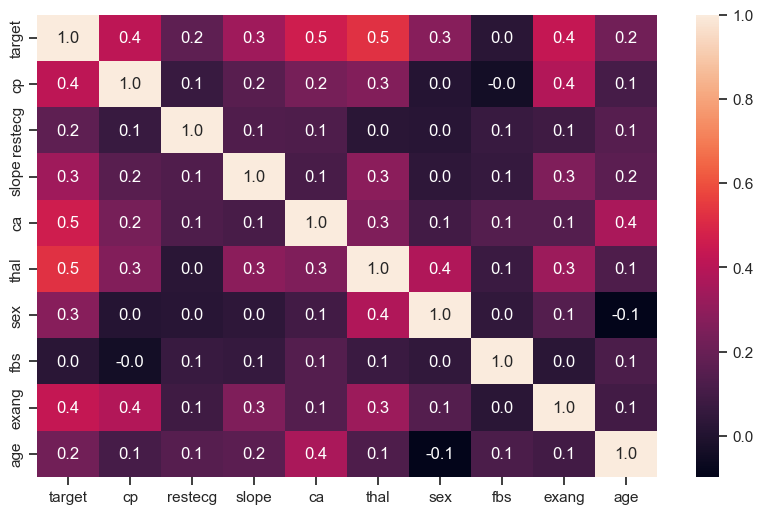

In [ ]:
#Correlation matrix seaborn
plt.figure(figsize=(10,6))
sns.heatmap(only_categorical.corr(),annot=True,fmt='.1f')
plt.show()

**Correlation Matrix Analysis**

* We can see that we have 'ca', 'thal',  that are moste corelated with the target with 50%

* We have 'sex' which is correlated with 'thal'

* We have 'exang' with 'cp'

**So we will base our Correpondance analysis on the 2 last cases**

In [ ]:
sex_thal_contingancyTab = pd.crosstab(only_categorical['sex'], only_categorical['thal'])
exang_cp__contingancyTab = pd.crosstab(only_categorical['exang'], only_categorical['cp'])

In [ ]:
sex_thal_contingancyTab

thal,3.0,6.0,7.0
sex,,,
0,81,1,15
1,87,17,102


In [ ]:
sex_thal_contingancyTab

thal,3.0,6.0,7.0
sex,,,
0,81,1,15
1,87,17,102


In [ ]:
ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(sex_thal_contingancyTab)

In [ ]:
#Display eigenvalues
print(ca.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.151       100.00%                    100.00%


* We observe that a single component captures 100% of the variance in our Correspondence Analysis. This result can be explained by the limited number of categories present in the two categorical variables (sex and thal) used in the analysis. Since sex is binary and thal has only three distinct values, there is insufficient variability to justify additional components. As a result, the entire association between these variables is effectively captured along a single dimension.

In [ ]:
print(ca.total_inertia_)

0.15132408086691945


In [ ]:
row_coords = ca.row_coordinates(sex_thal_contingancyTab)

col_coords = ca.column_coordinates(sex_thal_contingancyTab)

row_coords


,0
sex,
0,0.566894
1,-0.266935


In [ ]:
col_coords

,0
thal,
3.0,0.347270
6.0,-0.567119
7.0,-0.411395


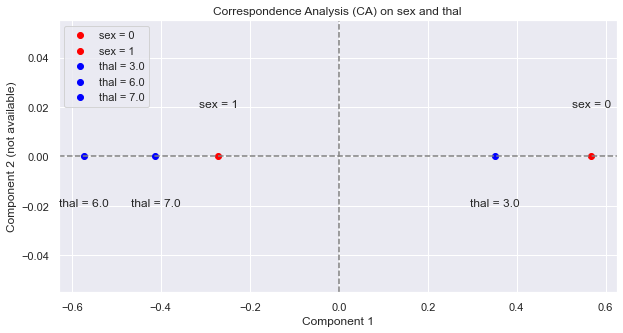

In [ ]:

# row_coords
sex_coords = {
    0: 0.567859,
    1: -0.271216
}

#col_coords
thal_coords = {
    3.0: 0.351868,
    6.0: -0.572313,
    7.0: -0.412215
}

plt.figure(figsize=(10, 5))

# Tracer les points pour 'sex'
for key, value in sex_coords.items():
    plt.scatter(value, 0, label=f'sex = {key}', color='red')
    plt.text(value, 0.02, f'sex = {key}', ha='center', fontsize=12)

# Tracer les points pour 'thal'
for key, value in thal_coords.items():
    plt.scatter(value, 0, label=f'thal = {key}', color='blue')
    plt.text(value, -0.02, f'thal = {key}', ha='center', fontsize=12)

# Lignes de référence
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Titres et légendes
plt.title('Correspondence Analysis (CA) on sex and thal')
plt.xlabel('Component 1')
plt.ylabel('Component 2 (not available)')
plt.grid(True)
plt.legend()
plt.show()


As previously noted, due to the limited variability in our two categorical variables, we were able to capture all the information in a single component, which is represented along one dimension. Based on the results of our Correspondence Analysis, we can interpret the associations as follows:

* sex = 0 (male) is closer to thal = 3, suggesting a potential dependency between these two categories.

* sex = 1 (female) is positioned closer to thal = 6 and thal = 7, with a stronger association towards thal = 7.

These associations indicate that there might be a relationship between the patient's sex and the observed values of thalassemia (thal). However, given the limited number of categories, caution should be exercised in over-interpreting these results.

In [ ]:

ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(exang_cp__contingancyTab)
sex_thal_contingancyTab

thal,3.0,6.0,7.0
sex,,,
0,81,1,15
1,87,17,102


In [ ]:
row_coords = ca.row_coordinates(exang_cp__contingancyTab)

col_coords = ca.column_coordinates(exang_cp__contingancyTab)
row_coords

,0
exang,
0,-0.325149
1,0.670004


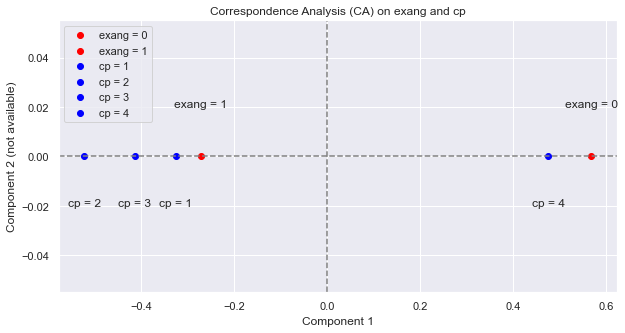

In [ ]:
exang_coords = {
    0:-0.318298,
    1:0.656285
}

#col_coords
thal_coords = {
    1:-0.325578,
    2:-0.522351,
    3:-0.413821,
    4:0.474864
}

plt.figure(figsize=(10, 5))

# Tracer les points pour 'sex'
for key, value in sex_coords.items():
    plt.scatter(value, 0, label=f'exang = {key}', color='red')
    plt.text(value, 0.02, f'exang = {key}', ha='center', fontsize=12)

# Tracer les points pour 'thal'
for key, value in thal_coords.items():
    plt.scatter(value, 0, label=f'cp = {key}', color='blue')
    plt.text(value, -0.02, f'cp = {key}', ha='center', fontsize=12)

# Lignes de référence
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Titres et légendes
plt.title('Correspondence Analysis (CA) on exang and cp')
plt.xlabel('Component 1')
plt.ylabel('Component 2 (not available)')
plt.grid(True)
plt.legend()
plt.show()


* We can se that cp {1, 2, 3 } are more closer to exang =0, and cp =4 is closer to exang = 1

### --> Since the CA between binary variables yielded only one component, we will expand the analysis to include a two-component CA, this time using the 'ca' and 'cp' features. 

In [ ]:

ca_cp__contingancyTab = pd.crosstab(only_categorical['cp'], only_categorical['ca'])
ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(ca_cp__contingancyTab)
ca_cp__contingancyTab

ca,0.0,1.0,2.0,3.0
cp,,,,
1,16,3,4,0
2,38,8,3,1
3,59,20,2,5
4,67,34,29,14


In [ ]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.085,83.14%,83.14%
1,0.017,16.75%,99.89%


* The first component captures 82.3% of the variance, and with the cumulative value approaching 100%, we have effectively captured all the information. This is due to the limited variability in our data, given that both variables only have 4 categories each.

In [ ]:
row_coords = ca.row_coordinates(ca_cp__contingancyTab)

col_coords = ca.column_coordinates(ca_cp__contingancyTab)
row_coords

,0,1
cp,,
1,-0.857928,1.096481
2,0.928359,0.313114
3,-0.169462,-0.499175
4,-0.084110,0.014266


In [ ]:
ca.plot(ca_cp__contingancyTab,
        x_component = 0,#First component
        y_component = 1,#Second component
        show_row_markers=True,
        show_column_markers=True,#
        show_row_labels=True,
        show_column_labels=True

)

alt.LayerChart(...)

* we can observe that cp=2 is closer to ca =0, suggesting a potential relationship between these two categories. * 

* Additionally, ca = 3 appears to be distinctly separated from the other points, indicating that it may represent a unique pattern or behavior that is not strongly associated with the other categories of chest pain

In [ ]:

ca_cp__contingancyTab = pd.crosstab(only_categorical['cp'], only_categorical['age'])
ca = prince.CA(n_components=2,
                n_iter=3, 
                copy=True,
                check_input=True, 
                engine='sklearn', 
                random_state=42)
ca = ca.fit(ca_cp__contingancyTab)
ca_cp__contingancyTab

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
cp,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,1,0,1,0,...,1,1,0,0,2,0,0,0,0,0
2,1,1,1,0,0,0,0,6,1,0,...,0,1,0,0,0,1,1,1,0,0
3,0,0,0,2,1,3,0,3,3,2,...,3,1,3,3,1,1,1,0,1,0
4,0,0,3,0,0,1,2,1,3,6,...,4,4,6,1,0,2,1,0,0,1


In [ ]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.210,40.10%,40.10%
1,0.178,34.10%,74.20%


In [ ]:
row_coords = ca.row_coordinates(ca_cp__contingancyTab)

col_coords = ca.column_coordinates(ca_cp__contingancyTab)
row_coords

,0,1
cp,,
1,-0.857928,1.096481
2,0.928359,0.313114
3,-0.169462,-0.499175
4,-0.084110,0.014266


In [ ]:
ca.plot(ca_cp__contingancyTab,
        x_component = 0,#First component
        y_component = 1,#Second component
        show_row_markers=True,
        show_column_markers=True,#
        show_row_labels=True,
        show_column_labels=True

)

alt.LayerChart(...)

**We can observe that:**

* cp=4 is closer to individuals with ages between 58 and 77.

* cp=3 is closer to individuals with ages between 51 and 67.

* cp=2 is closer to individuals with ages between 41 and 56.

This suggests that the level of chest pain (cp) tends to increase with age. We can hypothesize that as individuals get older, they may experience more severe chest pain, possibly due to underlying health conditions associated with aging.

In [ ]:
column_contributions = ca.column_contributions_
column_contributions
row_contributions = ca.row_contributions_
row_contributions

,0,1
1,0.266556,0.511958
2,0.678517,0.090757
3,0.038887,0.396743
4,0.016041,0.000543


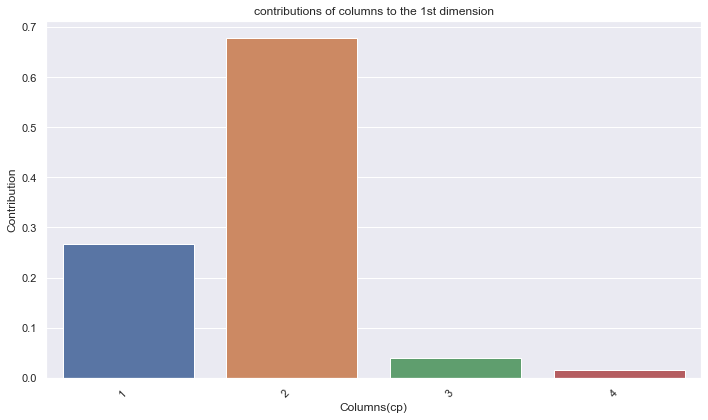

In [ ]:
#column_contributions
contrib_df =row_contributions.iloc[:, 0] 

plt.figure(figsize=(10,6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('contributions of columns to the 1st dimension')
plt.xlabel('Columns(cp)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')#rOtate the labels for readability
plt.tight_layout()
plt.show()


* We can observe that cp=1 and cp=2 contribute the most to the first component (component 0).
 The contribution of these categories to the first component means that they are more related to the underlying patterns in the data. 

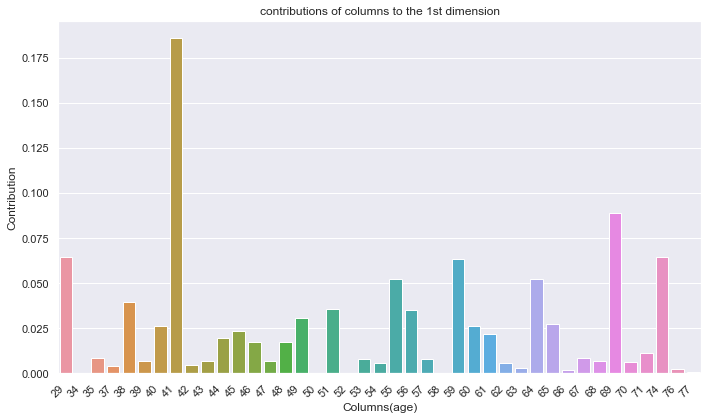

In [ ]:
#column_contributions
contrib_df =column_contributions.iloc[:, 0] 

plt.figure(figsize=(10,6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('contributions of columns to the 1st dimension')
plt.xlabel('Columns(age)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')#rOtate the labels for readability
plt.tight_layout()
plt.show()


* We can observe that the contribution of age is not homogeneous. There are peaks at ages 69, 59, 38, and 41. This could be attributed to the distribution of ages in our dataset, which is not uniform.

### CA conclusion: 


The Correspondence Analysis (CA) reveals meaningful relationships between categorical variables in the dataset. For example, we observed specific associations, such as **sex=0 (male)** being closer to **thal=3** and **sex=1 (female)** aligning more with **thal=7 or 6**. Similarly, other analyses between categorical variables like **cp** and **exang** showed distinct patterns, such as **cp=1, 2, 3** aligning with **exng=1** while **cp=4** stands apart, indicating less frequent or unique behavior.  

However, the explained variance captured by the components was not expressive, reflecting the small variability and the small number of categories in the analyzed variables. This is typical for datasets with low diversity in categorical variables, and the relationships derived may still provide valuable domain-specific insights despite the low variance.

CA remains a valuable exploratory tool here, especially for analyzing dependencies and identifying key variable associations, but its effectiveness could improve with more varied or well-distributed categories.

# Part 03: Multiple Correspondence Analysis

In [ ]:
# select only the categorical data 
continuous_features = list(set(['age','trestbps','chol','thalach','oldpeak']))

categorical_features = list(set(dataset.columns) -set(continuous_features)-set(['target']))
categorical_features.sort()

In [ ]:
dataset[categorical_features]

,ca,cp,exang,fbs,restecg,sex,slope,thal
0,3.0,3,0,1,2,1,1,3.0
1,1.0,4,1,0,2,1,2,3.0
2,1.0,4,1,1,2,1,2,3.0
3,1.0,4,0,0,0,1,1,7.0
4,0.0,4,1,0,0,0,2,7.0
...,...,...,...,...,...,...,...,...
298,1.0,2,0,0,2,1,1,7.0
299,2.0,4,0,1,0,1,2,7.0
300,1.0,4,1,0,0,1,1,7.0
301,1.0,4,1,0,2,1,1,7.0


In [ ]:
# The categories of each categorical column
for col in categorical_features:
    print (col, dataset[col].unique())

ca [3. 1. 0. 2.]
cp [3 4 2 1]
exang [0 1]
fbs [1 0]
restecg [2 0 1]
sex [1 0]
slope [1 2 3]
thal [3. 7. 6.]


In [ ]:
dataset['sex'] = dataset['sex'].map({0: 'F', 1: 'M'})
dataset['cp'] = dataset['cp'].map({1: 'Typical', 2: 'Atypical', 3: 'Non-anginal' , 4: ' Asymptomatic'})
dataset['exang'] = dataset['exang'].map({0: 'no', 1: 'yes'})
dataset['fbs'] = dataset['fbs'].map({1: 'yes', 0: 'No'})
dataset['slope'] = dataset['slope'].map({1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'})
dataset['thal'] = dataset['thal'].map({6: 'Fixed', 3: 'Normal', 7: 'Reversible'})
dataset['restecg'] = dataset['restecg'].map({0: 'normal' , 1: 'having ST-T' ,2: 'lvh'})
dataset['ca'] = dataset['ca'].map({0: 'No major vessels coloredr',1: 'one', 2: 'two', 3: 'three'})


In [ ]:
mca_df=dataset[categorical_features]
mca_df

,ca,cp,exang,fbs,restecg,sex,slope,thal
0,three,Non-anginal,no,yes,lvh,M,Upsloping,Normal
1,one,Asymptomatic,yes,No,lvh,M,Flat,Normal
2,one,Asymptomatic,yes,yes,lvh,M,Flat,Normal
3,one,Asymptomatic,no,No,normal,M,Upsloping,Reversible
4,No major vessels coloredr,Asymptomatic,yes,No,normal,F,Flat,Reversible
...,...,...,...,...,...,...,...,...
298,one,Atypical,no,No,lvh,M,Upsloping,Reversible
299,two,Asymptomatic,no,yes,normal,M,Flat,Reversible
300,one,Asymptomatic,yes,No,normal,M,Upsloping,Reversible
301,one,Asymptomatic,yes,No,lvh,M,Upsloping,Reversible


# Initialize the MCA Model

In [ ]:
# instantiate MCA class
import prince

mca = prince.MCA(
    n_components=7,
    n_iter=4,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

**fit the MCA Model**

In [ ]:
mca = mca.fit(mca_df)

**Eigenvalues***


  * **First Component (0.291, 15.54%)**: The first component has an eigenvalue of **0.291**, explaining **15.54%** of the total variance, although it does not account for the majority of the variance by itself.

 * The **second**, **third**, and **fourth** components explain **8.67%**, **8.42%**, and **7.69%** of the variance, respectively. Together with the **first** component, they collectively account for **61.09%** of the explained variance.

 * After **seven components**, the analysis explains **61.09%** of the total variance. This level of cumulative variance suggests that a most  of the associations between the categorical variables is represented by these components.

 * We can retain the **seven components** sinice in  MCA, explaining around 60-70% of the variance is often adequate for exploratory analysis.

 * We can observe that there is not a strong association between the categorical variables in the dataset

In [ ]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.292,15.56%,15.56%
1,0.162,8.65%,24.21%
2,0.158,8.40%,32.61%
3,0.143,7.61%,40.22%
4,0.138,7.37%,47.59%
5,0.128,6.84%,54.43%
6,0.124,6.62%,61.04%


# **Transforming the data and getting the new columns and rows’ coordinates**

**The coordinates of the columns (variables or categories) in the reduced dimensional space**

In [ ]:
mca.column_coordinates(mca_df)

,0,1,2,3,4,5,6
ca_No major vessels coloredr,-0.411625,0.094891,0.023185,0.072141,0.290164,-0.096091,-0.256630
ca_one,0.416958,-0.641368,-0.200377,-0.720614,-0.260786,-0.722524,0.481569
ca_three,0.907194,0.583582,1.055935,-1.423305,-0.015229,1.717995,1.149147
ca_two,0.759113,0.340444,-0.322830,1.640016,-0.920363,0.786858,-0.212936
cp_ Asymptomatic,0.716422,-0.276392,0.137596,0.268619,0.027891,0.186878,-0.063847
cp_Atypical,-0.955167,-0.156005,-0.512681,0.483908,0.825413,0.567159,0.941890
cp_Non-anginal,-0.634760,0.103691,0.299312,-0.916574,-0.544316,-0.108013,-0.380998
cp_Typical,-0.035526,1.681878,-0.866114,0.693428,0.066272,-1.999093,-0.223248
exang_no,-0.472078,0.169037,-0.021533,-0.063695,-0.024567,0.025795,0.137001
exang_yes,0.972767,-0.348319,0.044371,0.131250,0.050622,-0.053153,-0.282304


**The rows of the columns (variables or categories) in the reduced dimensional space**

In [ ]:
mca.row_coordinates(mca_df).head()

,0,1,2,3,4,5,6
0,-0.150308,0.757541,0.205183,-0.941852,-0.664534,0.762187,0.527103
1,0.573208,-0.421991,0.072336,-0.068238,-0.153801,-0.480840,0.316514
2,0.650759,0.070604,-0.014823,-0.220629,-0.558950,-0.184340,0.262239
3,0.178863,-0.456032,-0.453766,-0.337648,0.137924,0.015478,0.004969
4,0.394437,-0.507286,0.241704,0.258408,0.092007,0.044276,-0.503558


# Scree Plot

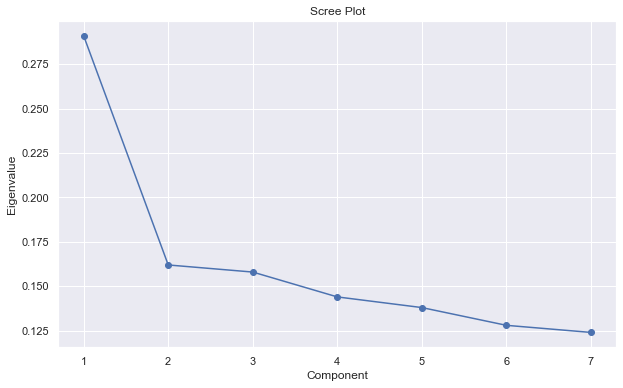

In [ ]:
import matplotlib.pyplot as plt

# Eigenvalues 
eigenvalues = [0.291, 0.162, 0.158, 0.144, 0.138, 0.128, 0.124]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.show()


# Contribution Circle

# Retrieve the Contribution of Each Patient (Row) to the First Dimension

The plot  visualizes the contributions of each row (or patients observation) to the first dimension of the Multiple Correspondence Analysis (MCA).

* We can see that the 10 first patients contribute significantly, and similarly to the variance of the cfirst component.

* The highest contribution rows in the plot seem to be row 205 and 62.


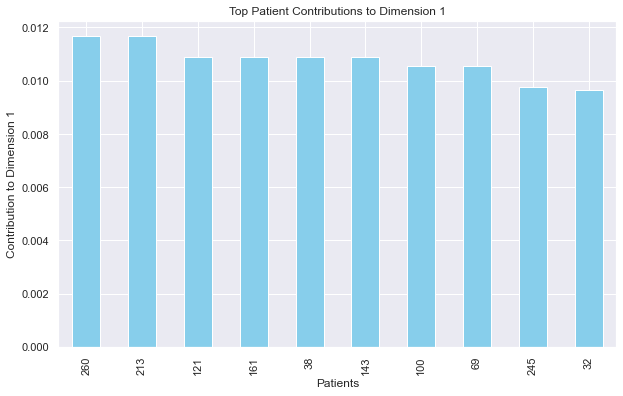

In [ ]:

# Get the contributions of each patient  to Dimension 1
patient_contributions = mca.row_contributions_[0]  # 1st dimension 

# Sort and plot the top contributions
top_patient_contributions = patient_contributions.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_patient_contributions.plot(kind='bar', color='skyblue')
plt.title("Top Patient Contributions to Dimension 1")
plt.xlabel("Patients")
plt.ylabel("Contribution to Dimension 1")
plt.show()


# Retrieve the Contribution of Each Feature Category (Column) to the First Dimension

**Which feature categories contribute the most to Dimension 1, whiwh represent only 15.5% of the variance which is not really significant**


The bar plot displays the contributions of various categorical variables (categories) to the first dimension of the Multiple Correspondence Analysis (MCA). 

* **exang_yes**: This modality has the highest contribution (approximately 0.13), indicating that it plays a significant role in defining the first dimension. This could mean that whether or not a patient experiences exercise-induced angina is a major factor in the patterns captured by Dimension 1.
  
* **thal_normal** and **cp_asymptomatic**: These categories also show also a valuable contribution, indicating that they  play important roles in distinguishing patients along this dimension.

 * **sex_F** (female sex) has a lower contribution compared to other features, meaning that sex, while relevant, is less influential in defining Dimension 1
* **the others**: These categories contribute moderately, suggesting that age-related is not as dominant as the inflated modality.


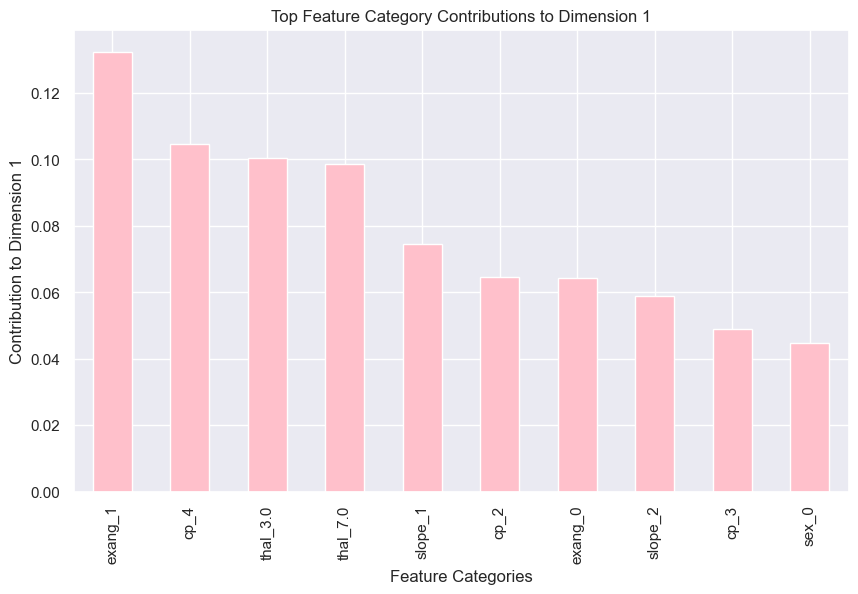

In [ ]:
# Get the contributions of each feature column to Dimension 1
feature_contributions = mca.column_contributions_[0]  # 1st dimension 

# Sort and plot the top contributions
top_feature_contributions = feature_contributions.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_feature_contributions.plot(kind='bar', color='pink')
plt.title("Top Feature Category Contributions to Dimension 1")
plt.xlabel("Feature Categories")
plt.ylabel("Contribution to Dimension 1")
plt.show()


# **Getting the quality representation of each patient in the 1st dimension**

In **MCA biplot** for the heart disease dataset,we are vizualizing the relationship between row and column points based on the two principal components. 

 *  The x-axis (Component 0) explains 15.56% of the variance, while the y-axis (Component 1) explains 8.56%. Together, these components capture less than 25% of the variance in the data, of course additional components may be needed for a more complete representation.


 * **Column Points:** The points represent categorical variables from the dataset, positioned based on their association with the principal components.

 * **cp_3**, **c_0**, **slope_1**, **thal_3**, **restecg_0**, and **sex_0**. This grouping suggests that individuals with these attributes may share similar profiles within the dataset.

 * **thal_6**, represent rare or unique profiles that deviate from the main groupings, potentially indicating outliers or subgroups.

 * **cp_3**, **cp_2**, **slope_0**, **thal_3**, **restecg_0**, and **sex_0**. This grouping suggests that individuals with these attributes may share similar profiles within the dataset.

 * **Contributions**
 * **slope_3** and **thal_6.0** have strong positive contributions to Component 1 **(PC2)**.
 * **cp_1** and **fbs_1** have strong positive contributions to **PC2** as well.
 * **ca_3**, **ca_2.0**, and **restecg_1** have strong positive contributions to Component 0 **(PC1)**.
 * Variables close to the **origin**, such as **exang_0**, **thal_3.0**, and **sex_0**, contribute **less** to either component, indicating these variables may not be as important in differentiating along these components.
   



In [ ]:
mca.plot(
    mca_df,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=False,
    show_column_labels= True,
    show_row_labels= False
)

C:\Users\linam\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\linam\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\linam\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

# FAMD Analysis

FAMD is a suitable method for datasets that contain both numerical and categorical variables that will be used on our Heart Disease dataset

In [ ]:
famd = prince.FAMD(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn')
famd = famd.fit(dataset)
famd_result = famd.transform(dataset)

In [ ]:
famd_result

component,0,1
0,1.300255,-1.372288
1,-6.911145,-1.130363
2,-8.003546,-0.379464
3,-2.423757,0.680812
4,-3.485084,1.797672
...,...,...
298,-3.831506,0.966201
299,-5.010721,-1.652436
300,-3.791050,-0.618216
301,-6.459759,-1.755425


In [ ]:
famd.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,30.184,1.34%,1.34%
1,20.136,0.89%,2.24%


* The total variance captured by the FAMD is very low (2.24%). This indicates that the dataset does not exhibit strong patterns or associations across the variables.

* The low variance captured by FAMD compared to PCA or MCA is likely due to the mixed nature of our  dataset and the technique’s attempt to balance numerical and categorical variables. This is not necessarily a limitation of FAMD but rather an indication that the dataset might not have strong shared structures between numerical and categorical variables.

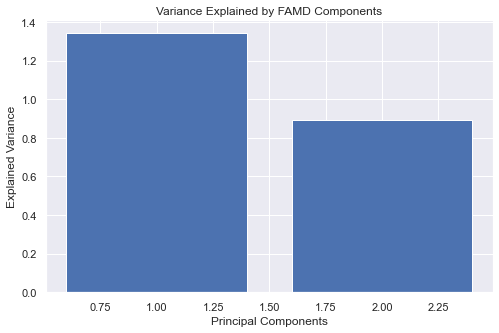

In [ ]:
# Variance explained by each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(famd.percentage_of_variance_) + 1), famd.percentage_of_variance_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance Explained by FAMD Components')
plt.show()


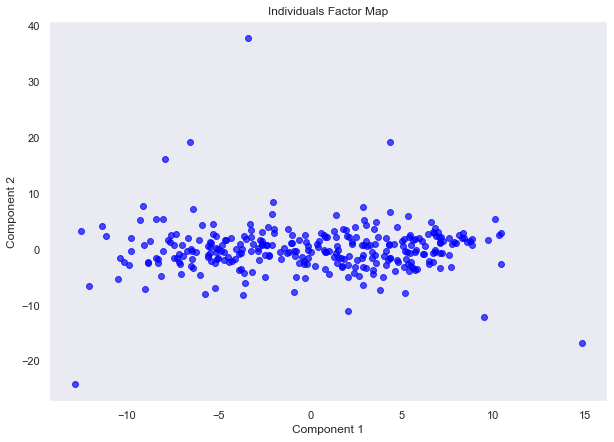

In [ ]:
# Individuals plot
plt.figure(figsize=(10, 7))
plt.scatter(famd_result.iloc[:, 0], famd_result.iloc[:, 1], alpha=0.7, color='blue')
plt.title('Individuals Factor Map')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()


We can se that our data has no cluster patter and is not dintingused can not be groupe into groups of patterns

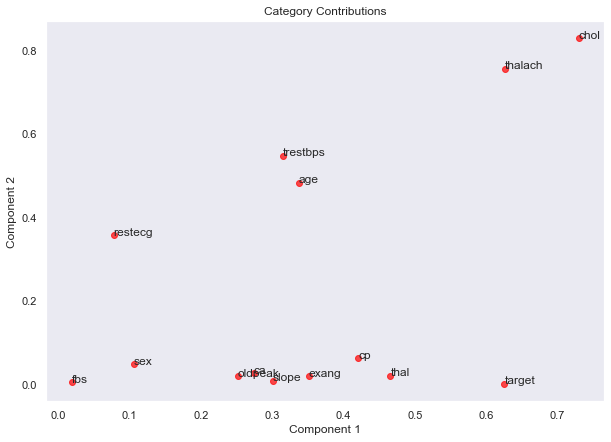

In [ ]:
# Contribution of categories
category_coordinates = famd.column_coordinates_

plt.figure(figsize=(10, 7))
plt.scatter(category_coordinates[0], category_coordinates[1], alpha=0.7, color='red')
for i, txt in enumerate(category_coordinates.index):
    plt.annotate(txt, (category_coordinates.iloc[i, 0], category_coordinates.iloc[i, 1]), fontsize=12)
plt.title('Category Contributions')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()


In [ ]:
# Contribution of variables
famd.column_contributions_

# Contribution of individuals
famd.row_contributions_


component,0,1
0,0.000185,0.000309
1,0.005223,0.000209
2,0.007004,0.000024
3,0.000642,0.000076
4,0.001328,0.000530
...,...,...
298,0.001605,0.000153
299,0.002745,0.000448
300,0.001571,0.000063
301,0.004563,0.000505


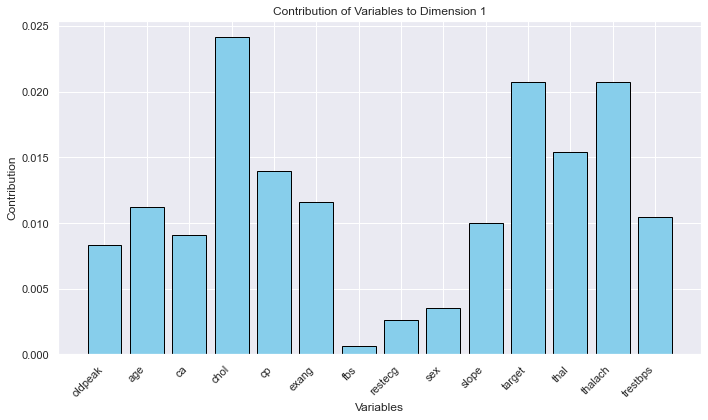

In [ ]:
# Get the contribution of variables to the first dimension
contrib_dim1 = famd.column_contributions_.iloc[:, 0]  # Contribution to the 1st dimension

# Plot the contributions
plt.figure(figsize=(10, 6))
plt.bar(contrib_dim1.index, contrib_dim1.values, color='skyblue', edgecolor='black')
plt.title('Contribution of Variables to Dimension 1')
plt.xlabel('Variables')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


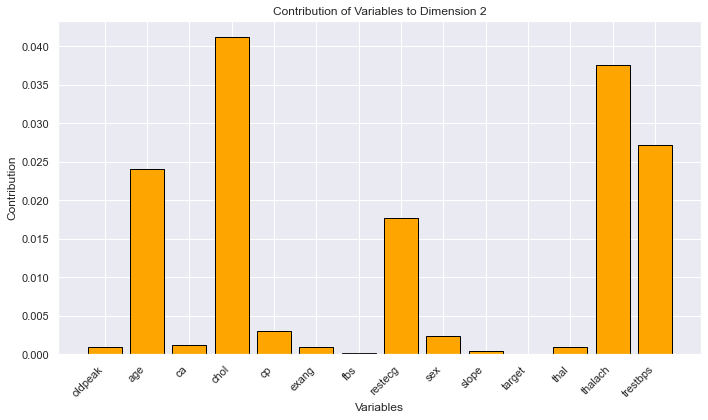

In [ ]:
# Get the contribution of variables to the second dimension
contrib_dim2 = famd.column_contributions_.iloc[:, 1]  # Contribution to the 2nd dimension

# Plot the contributions
plt.figure(figsize=(10, 6))
plt.bar(contrib_dim2.index, contrib_dim2.values, color='orange', edgecolor='black')
plt.title('Contribution of Variables to Dimension 2')
plt.xlabel('Variables')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* We observe that the continuous variables such as **age**, **chol**, and **thalach** are the primary contributors to both the first and second components (CP1 and CP2). This indicates that the captured variance is largely driven by these numerical variables. 

However, this also suggests a limitation in how well the categorical variables are represented in the components. The categorical variables might not contribute significantly or could be adding noise to the analysis. This imbalance between the contributions of continuous and categorical variables might explain why the overall variance captured by the components remains low. It highlights that the mixed nature of the dataset (numerical vs. categorical) can reduce the effectiveness of the FAMD in capturing meaningful variance across all variables.

**Interesting Point:**  
This observation underscores the importance of balancing the representation of variable types in mixed datasets. Continuous variables may dominate the results, overshadowing the potential relationships or patterns introduced by the categorical variables. This could suggest that preprocessing steps, such as reducing noise from categorical variables or carefully selecting relevant features, might improve the analysis.



### FAMD Conclusions:

The FAMD analysis shows that the variance captured is relatively low, with the first two dimensions accounting for only a small percentage of the total variance. This outcome reflects the challenges of balancing the contributions of continuous and categorical variables in a mixed dataset. Continuous variables dominate the contributions to the first two components, while categorical variables add less structured information, possibly contributing noise instead of meaningful patterns.

This highlights the importance of feature engineering and careful variable selection when working with mixed datasets. While FAMD can provide insights into the relationships between different types of variables, the results here suggest that the dataset may require additional preprocessing to reduce noise and improve the analysis.



# Analyse comparative

From our analyses, we can draw the following observations and insights: 

**Continuous Variable Distribution**

From the distribution of our continuous variables, we observe that most variables follow an approximate normal distribution. This is beneficial for statistical and machine learning models that assume normality, such as linear regression or PCA. 

However, the distribution across different categories is not homogeneous. For example, certain categories have significantly fewer observations than others, which indicates class imbalance. This could potentially bias our analysis and reduce the robustness of the results. 

**Correlation Analysis**

Visualizing the heatmap of correlations between continuous variables reveals relatively low correlation values, with a maximum of only around 0.58

Additionally, the target variable shows weak correlations with other features, indicating that the existing variables may not sufficiently explain the target outcome. This suggests the need to augment the dataset with additional features or perform feature engineering to uncover hidden relationships. 

**PCA (Principal Component Analysis)** 

PCA on continuous variables allowed us to capture approximately 75% of the variance with only 3 components, which is a good dimensionality reduction outcome. This reduces the complexity of the dataset while retaining most of the information. 

Although we did not identify clear patterns or clusters in the reduced PCA space, the transformation could still be advantageous for training machine learning models by simplifying the data structure and reducing noise. 

**CA (Correspondence Analysis)**

For categorical data, performing CA on a single variable was not very informative since we captured 100% of the variance due to the limited number of categories. 

By combining two variables (e.g., ca and cp), we captured 83% of the variance with the first component and the remaining 16% with the second component, effectively reducing the dimensionality of the categorical dataset. 

This method allowed us to visualize relationships between categorical variables, such as the association between chest pain levels (cp) and age. For instance, higher levels of chest pain (cp) appear to correlate with older age groups, suggesting that aging might be linked to more severe health conditions. 

**MCA (Multiple Correspondence Analysis)**

 * Captures less variance in the first components (around 25% with two components).
 * Focuses on relationships between categorical variables and identifies groupings or outliers.
 * Highlights contributions of rare or unique categories, though more dimensions may be needed for complete representation.
 * Suitable for visualizing categorical data and identifying shared profiles or distinctions.


**FAMD (Factorial Analysis of Mixed Data)**

FAMD captured a relatively low proportion of variance in the first components, reflecting the challenge of balancing contributions from continuous and categorical variables in a mixed dataset. 

Continuous variables dominated the contributions to the first components, while categorical variables added less structured information and potentially introduced noise. 

This result emphasizes the need for careful preprocessing and feature engineering when working with mixed data. For example, creating new variables based on existing ones or transforming categorical variables to reduce redundancy and enhance interpretability. 

 

**Proposed Solutions**

 * **Feature Engineering:** Create new variables that better capture relationships within the data. For instance, derive interaction terms or combine existing variables into composite features. 

 * **Additional Data:** Enrich the dataset with external variables or measures that could improve the predictive power and correlations with the target variable. 

 * **Class Balancing:** Address class imbalance through resampling techniques (e.g., oversampling minority classes or undersampling majority classes) to ensure fair representation across categories. 

 * **Advanced Preprocessing:** Experiment with transformations for both continuous (e.g., normalization) and categorical variables (e.g., one-hot encoding or hierarchical grouping) to better align with the analysis methods. 
 

**Conclusion**

The comparative analysis highlights the strengths and limitations of each method: 

PCA is highly effective for continuous data, capturing significant variance with fewer components. 

CA is best suited for categorical variables, offering insights into relationships between categories. 

FAMD provides a holistic view for mixed datasets but requires careful tuning to overcome the challenges of integrating different variable types. 